# SDF Estimation Using Historical Data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from numpy.linalg import inv

/Users/cd/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Data Processing

In [2]:
tickers = ["UNH", "MSFT", "GS", "HD", "CAT", "CRM", "MCD", "AMGN", "V", "TRV", "AXP", "BA", "HON", "IBM", "JPM", "AAPL", "AMZN", "JNJ", "PG", "CVX", "MRK", "DIS", "NKE", "MMM", "KO", "WMT", "CSCO"]

In [3]:
P = (
 yf.download(tickers, start="2014-01-01", end="2024-09-01", progress=False)
 .loc[:, "Adj Close"]
 .resample("M")
 .last()
 .pct_change()
 .dropna()
 )

In [10]:
P.head()

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2014-02-28 00:00:00+00:00,0.057511,0.047937,0.009507,0.073630,0.035024,0.032584,0.030398,-0.005021,0.042322,0.112932,...,0.019015,0.057924,0.075892,0.020012,0.078111,0.026625,0.031496,0.069037,0.050676,0.000268
2014-03-31 00:00:00+00:00,0.019953,-0.005483,-0.071058,-0.013695,-0.026606,0.024750,-0.084656,0.028441,0.031042,-0.009157,...,0.030268,0.006903,0.003915,0.069956,-0.056705,0.024663,0.021080,0.064918,-0.044614,0.029761
2014-04-30 00:00:00+00:00,0.099396,-0.093968,-0.095847,-0.026423,0.028130,0.066927,-0.095288,0.039586,0.055588,-0.009117,...,0.034173,0.025283,0.031530,-0.014394,-0.012321,0.032376,0.064395,-0.084766,-0.061382,0.042915
2014-05-31 00:00:00+00:00,0.078710,0.043640,0.027685,0.046552,0.054169,-0.030076,0.018974,0.065339,-0.013399,0.058861,...,0.008558,0.031163,-0.011953,0.020515,0.057612,-0.021320,0.031685,0.061167,0.062317,-0.030921
2014-06-30 00:00:00+00:00,0.027662,0.020519,0.039130,0.036831,-0.059298,0.062995,0.103553,0.009342,0.063197,0.020593,...,-0.006803,0.004840,0.007364,0.018564,0.008322,-0.027231,0.012498,0.031448,-0.019178,-0.022144


In [5]:
T = P.shape[0]

iota = np.ones((P.shape[1], 1))

P_transpose = P.T
matrix_to_invert = (1/T) * np.dot(P_transpose, P)
inverse_matrix = np.linalg.inv(matrix_to_invert)

x_star = np.dot(np.dot(P, inverse_matrix), iota)

x_star

array([[ 2.59537909e+01],
       [ 2.76570363e+01],
       [ 6.02826579e+00],
       [-3.01393126e+00],
       [ 7.90328783e+00],
       [-2.56602429e+01],
       [ 3.85956376e+01],
       [ 1.28809875e+01],
       [ 5.82220385e+00],
       [ 3.93770830e+01],
       [-1.16092572e+01],
       [-1.42113894e+01],
       [ 2.63288882e+01],
       [-1.58170876e+01],
       [-1.38592747e+00],
       [-1.04794663e+00],
       [-1.65519418e+01],
       [ 3.33624866e+01],
       [-5.86793827e+01],
       [ 1.24332724e+01],
       [ 4.98408651e+01],
       [-1.89711637e-01],
       [ 3.29658414e+01],
       [-3.54840799e+00],
       [-4.57824277e+00],
       [ 3.82434020e+01],
       [ 1.20617273e+01],
       [ 3.06371417e+01],
       [ 3.25814753e+01],
       [ 1.92126157e+00],
       [ 5.13777967e+00],
       [-7.33874868e-02],
       [-1.67608605e+01],
       [-2.49240410e+00],
       [ 1.51265353e+01],
       [ 1.32852397e+01],
       [ 3.89176407e+01],
       [-9.35476616e-01],
       [-3.3

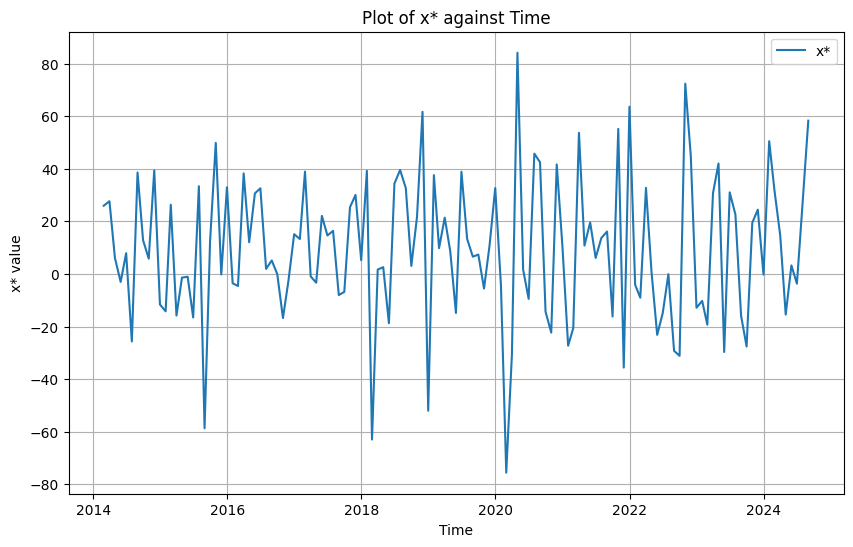

In [6]:
import matplotlib.pyplot as plt

time_index = P.index

plt.figure(figsize=(10, 6))
plt.plot(time_index, x_star[:len(time_index)], label="x*")

plt.xlabel("Time")
plt.ylabel("x* value")
plt.title("Plot of x* against Time")
plt.grid(True)
plt.legend()

plt.show()

In [7]:

sdf = x_star[:P.shape[0]]  

sdf_adjusted_returns = sdf * P.values 

expected_values = sdf_adjusted_returns.mean(axis=0)

print("Expected values of SDF-adjusted returns for each asset:")
print(expected_values)

correctly_priced = np.isclose(expected_values, 1, atol=0.01)  

print("Is each asset correctly priced?")
print(correctly_priced)

Expected values of SDF-adjusted returns for each asset:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]
Is each asset correctly priced?
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [8]:
from scipy.optimize import minimize

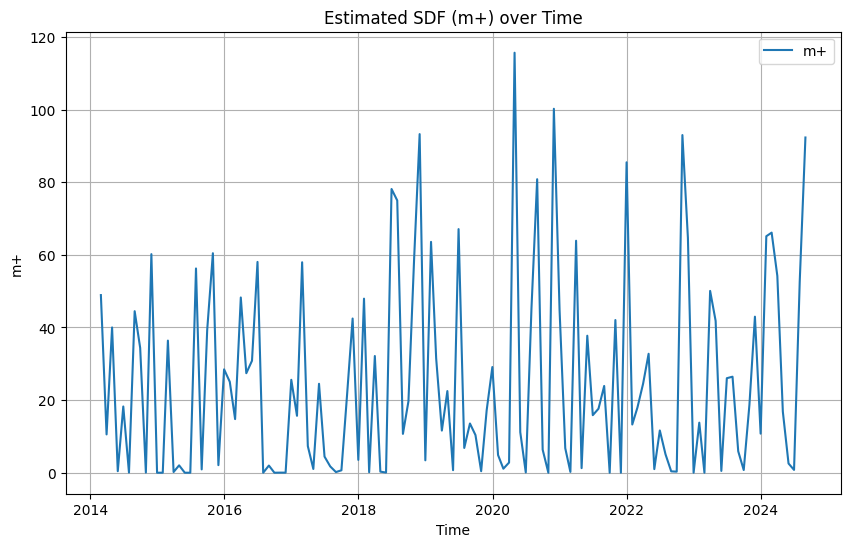

Inner products of (m+ - x*) with original returns:
[ 0.00419025 -0.10960572 -0.01135721  0.08392767  0.12117658  0.13010688
 -0.00317989 -0.03116731 -0.00721006 -0.06757541  0.02352477  0.01472013
 -0.12202304 -0.10147771  0.14272121 -0.01687553 -0.08462217 -0.04374473
 -0.11635077 -0.02197099  0.0221237   0.0033795  -0.08831994 -0.0510001
  0.08349394  0.13526386  0.06293685]


In [9]:
n_assets = P.shape[1]

def pricing_error(sdf, returns):
    pricing_errors = np.mean(sdf[:, None] * returns, axis=0) - 1
    return np.sum(pricing_errors**2)

initial_guess = np.ones(P.shape[0])

bounds = [(1e-8, None) for _ in range(P.shape[0])]  

result = minimize(pricing_error, initial_guess, args=(P,), bounds=bounds)

m_plus = result.x

time_index = P.index

plt.figure(figsize=(10, 6))
plt.plot(time_index, m_plus, label='m+')
plt.title("Estimated SDF (m+) over Time")
plt.xlabel("Time")
plt.ylabel("m+")
plt.grid(True)
plt.legend()
plt.show()

difference = m_plus - x_star[:len(m_plus)].flatten()

inner_products = np.dot(difference, P)

print("Inner products of (m+ - x*) with original returns:")
print(inner_products)